## Import + Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [3]:
#all columns linked to geo-demographic
train.columns[13:82]
geo_demo_list = train.columns[13:82].tolist()
geo_demo_list

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [4]:
df_hosp = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/us_hospital_locations.csv")
df_phys = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/National_Downloadable_File_2018.csv")

## Data Pre-processing

In [5]:
# Filter dataframe to include only rows where STATUS is 'OPEN'
df_open = df_hosp[df_hosp['STATUS'] == 'OPEN']

# Extract the first 3 digits of ZIP
df_open['patient_zip3'] = df_open['ZIP'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of hospitals in each group
hospital_counts_by_zip3 = df_open.groupby('patient_zip3').size().reset_index(name='Hospital_Count')

hospital_counts_by_zip3

,patient_zip3,Hospital_Count
0,100,26
1,103,5
2,104,15
3,105,13
4,106,6
...,...,...
821,995,14
822,996,6
823,997,6
824,998,4


In [6]:
# Filter dataframe to include only rows where pri_spec contains 'oncology'
df_oncology = df_phys[df_phys[' pri_spec'].str.contains('oncology', case=False, na=False)]

# Extract the first 3 digits of ZIP
df_oncology['patient_zip3'] = df_oncology[' zip'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of physicians in each group
physician_counts_by_zip3 = df_oncology.groupby('patient_zip3').size().reset_index(name='Physician_Count')

physician_counts_by_zip3

,patient_zip3,Physician_Count
0,006,16
1,007,11
2,008,1
3,009,14
4,010,2
...,...,...
854,995,71
855,996,18
856,997,6
857,998,4


In [7]:
# Convert 'ZIP_3' column to integers in physician_counts_by_zip3 DataFrame
physician_counts_by_zip3['patient_zip3'] = physician_counts_by_zip3['patient_zip3'].astype(int)

# Convert 'ZIP_3' column to integers in hospital_counts_by_zip3 DataFrame
hospital_counts_by_zip3['patient_zip3'] = hospital_counts_by_zip3['patient_zip3'].astype(int)

In [8]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')

# Merge physician_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [9]:
train['Hospital_Count'] = train['Hospital_Count'].fillna(0)
train['Physician_Count'] = train['Physician_Count'].fillna(0)

In [10]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')
# physician_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [11]:
test['Hospital_Count'] = test['Hospital_Count'].fillna(0)
test['Physician_Count'] = test['Physician_Count'].fillna(0)

In [12]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [13]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


## Feature Engineering

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 85 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [15]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [16]:
categorical_cols

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [17]:
numerical_cols

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'male', 'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
     

### Physician per Population

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
class Phys_per_Pop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Phys_per_Pop'] = X_copy['Physician_Count'] / X_copy['population'] *100000
        # Handling division by zero
        X_copy['Phys_per_Pop'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
        X_copy['Phys_per_Pop'].fillna(0, inplace=True)  # Replace NaN values with 0
        return X_copy
    
Phys_per_Pop().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Phys_per_Pop
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,101.788455
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,332.294880
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,931.958682
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.4

### Hospital per Population

In [20]:
class Hos_per_Pop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Hos_per_Pop'] = X_copy['Hospital_Count'] / X_copy['population'] * 100000
         # Handling division by zero
        X_copy['Hos_per_Pop'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
        X_copy['Hos_per_Pop'].fillna(0, inplace=True)  # Replace NaN values with 0
               
        
        return X_copy
    
Hos_per_Pop().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Hos_per_Pop
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,9.542668
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,28.117259
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,150.022617
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.46428

### Drop Columns

In [21]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColumn(cols=['patient_id']).fit_transform(train)

,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count
0,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0
1,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0
2,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0
3,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,1

### Text Preprocessor

In [22]:
train.breast_cancer_diagnosis_desc.unique()

array(['Malignant neoplasm of unsp site of unspecified female breast',
       'Malig neoplm of upper-outer quadrant of right female breast',
       'Malignant neoplasm of central portion of left female breast',
       'Malig neoplasm of upper-inner quadrant of left female breast',
       'Malignant neoplasm of breast (female), unspecified',
       'Malignant neoplasm of unspecified site of left female breast',
       'Malig neoplasm of lower-outer quadrant of left female breast',
       'Malignant neoplasm of upper-outer quadrant of female breast',
       'Malig neoplasm of upper-outer quadrant of left female breast',
       'Malignant neoplasm of ovrlp sites of left female breast',
       'Malignant neoplasm of unsp site of right female breast',
       'Malig neoplasm of lower-inner quadrant of left female breast',
       'Malig neoplm of lower-inner quadrant of right female breast',
       'Malignant neoplasm of central portion of right female breast',
       'Malignant neoplasm of c

In [23]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.replacement_dict = {
            'Malig': 'malignant',
            'neoplasm': 'neoplasms',
            'neoplm': 'neoplasms',
            'overlapping': 'overlap',
            'ovrlp':'overlap',
            'site': 'sites',
            'unsp': 'unspecified'
        }
        
    def fit(self, X, y=None):
        # Fit the TF-IDF vectorizer on the processed text
        processed_text = self._process_text(X[self.columns[0]])
        self.vectorizer.fit(processed_text)
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column in self.columns:
            processed_text = self._process_text(X_copy[column])
            # Transform the processed text using TF-IDF vectorizer
            tfidf_features = self.vectorizer.transform(processed_text)
            # Convert sparse matrix to array and then to DataFrame
            tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=self.vectorizer.get_feature_names_out())
            # Prepend 'text_' prefix to the column names
            tfidf_df.columns = ['text_' + col for col in tfidf_df.columns]
            # Concatenate the DataFrame with the original X_copy DataFrame
            X_copy = pd.concat([X_copy, tfidf_df], axis=1)
        return X_copy
    
    def _process_text(self, texts):
        processed_texts = []
        for text in texts:
            # Apply text replacement
            for old_word, new_word in self.replacement_dict.items():
                text = re.sub(r'\b{}\b'.format(old_word), new_word, text)
            # Convert text to lowercase
            text = text.lower()
            # Remove non-alphanumeric characters and extra whitespaces
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
            # Remove extra whitespaces
            text = re.sub(r'\s+', ' ', text).strip()
            processed_texts.append(text)
        return processed_texts


TextPreprocessor(columns=['breast_cancer_diagnosis_desc']).fit_transform(train) 

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,text_areola,text_axillary,text_breast,text_central,text_female,text_left,text_lowerinner,text_lowerouter,text_male,text_malignant,text_neoplasms,text_nipple,text_overlap,text_portion,text_quadrant,text_right,text_secondary,text_sites,text_specified,text_tail,text_unspecified,text_upperinner,text_upperouter
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,0.0,0.0,0.242252,0.000000,0.242590,0.000000,0.0,0.0,0.0,0.242233,0.242233,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.415967,0.0,0.0,0.769469,0.000000,0.000000
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,0.0,0.0,0.219129,0.000000,0.219434,0.000000,0.0,0.0,0.0,0.219112,0.219112,0.0,0.0,0.000000,0.486977,0.463183,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.596763
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.5600

## Assembling the pipeline

In [24]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [25]:
categorical_cols

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [26]:
cols = ['breast_cancer_diagnosis_code',
        'metastatic_cancer_diagnosis_code',
        'patient_zip3',
        'patient_age',
        'payer_type',
        'patient_state',
        'breast_cancer_diagnosis_desc']

In [27]:
named_preprocessing_pipeline = Pipeline([
#     ('textprocessor', TextPreprocessor(columns=['breast_cancer_diagnosis_desc'])),
    
    ('Physician_per_Population', Phys_per_Pop()),
    ('Hospital_per_Population', Hos_per_Pop()),
     ('drop', DropColumn(cols=[
         #'breast_cancer_diagnosis_desc',
         'population',
         'Hospital_Count',
         'Physician_Count'
         ])),
      
    ('prep', ColumnTransformer([
        ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         ['breast_cancer_diagnosis_code',
          'metastatic_cancer_diagnosis_code',
          'patient_zip3',
          'patient_age',
          'payer_type',
          'patient_state',
          'breast_cancer_diagnosis_desc',
          #'Hospital_Count','Physician_Count','population',
          #'Phys_per_Pop',
          #'Hos_per_Pop'
        ]
        ),
         ],
        remainder='passthrough').set_output(transform='pandas')),
    ])

named_preprocessing_pipeline  

Pipeline(steps=[('Physician_per_Population', Phys_per_Pop()),
                ('Hospital_per_Population', Hos_per_Pop()),
                ('drop',
                 DropColumn(cols=['population', 'Hospital_Count',
                                  'Physician_Count'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'patient_zip3',
                                                   'patient_age', 'payer_type',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc'])]))])

In [28]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
    
    
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [29]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('Physician_per_Population', Phys_per_Pop()),
                ('Hospital_per_Population', Hos_per_Pop()),
                ('drop',
                 DropColumn(cols=['population', 'Hospital_Count',
                                  'Physician_Count'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['breast_cancer_diagnosis_code',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'patient_zip3',
                                                   'patient_age', 'payer_type',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc'])])),
                ('scale', RobustScaler())])

In [30]:
X = train[cols+['DiagPeriodL90D',
                'Hospital_Count',
                'Physician_Count',
                'population',
               ]].drop(columns=['DiagPeriodL90D'], axis=1)
y = train['DiagPeriodL90D']

In [31]:
X.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,breast_cancer_diagnosis_desc,Hospital_Count,Physician_Count,population
0,C50919,C7989,924,84,MEDICAID,CA,Malignant neoplasm of unsp site of unspecified...,3.0,32.0,31437.75000
1,C50411,C773,928,62,COMMERCIAL,CA,Malig neoplm of upper-outer quadrant of right ...,11.0,130.0,39121.87879
2,C50112,C773,760,43,COMMERCIAL,TX,Malignant neoplasm of central portion of left ...,33.0,205.0,21996.68333
3,C50212,C773,926,45,COMMERCIAL,CA,Malig neoplasm of upper-inner quadrant of left...,22.0,141.0,32795.32558
4,1749,C773,836,55,COMMERCIAL,ID,"Malignant neoplasm of breast (female), unspeci...",12.0,59.0,10886.26000


In [32]:
X = TextPreprocessor(columns=['breast_cancer_diagnosis_desc']).fit_transform(X) 

In [33]:
#checking output on train df
df_train = modelling_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encode__breast_cancer_diagnosis_code      12906 non-null  float64
 1   encode__metastatic_cancer_diagnosis_code  12906 non-null  float64
 2   encode__patient_zip3                      12906 non-null  float64
 3   encode__patient_age                       12906 non-null  float64
 4   encode__payer_type                        11103 non-null  float64
 5   encode__patient_state                     12855 non-null  float64
 6   encode__breast_cancer_diagnosis_desc      12906 non-null  float64
 7   remainder__text_areola                    12906 non-null  float64
 8   remainder__text_axillary                  12906 non-null  float64
 9   remainder__text_breast                    12906 non-null  float64
 10  remainder__text_central           

## Modelling

### CatBoost

In [34]:
#catboost library
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline

In [35]:
#Best CB hyperparameter {'depth': 4, 'l2_leaf_reg': 0.9645925640276364, 'learning_rate': 0.014127701493839157, 'colsample_bylevel': 0.6958766195896917, 'subsample': 0.7354377846364138}

catboost_params_optuna = {'depth': 4, 'l2_leaf_reg': 0.9645925640276364, 'learning_rate': 0.014127701493839157, 'colsample_bylevel': 0.6958766195896917, 'subsample': 0.7354377846364138,
                          'random_seed': 42,
                          'eval_metric': 'AUC',
                          'verbose': False,
                          'loss_function': 'Logloss',
                         }

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna)


cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('Physician_per_Population', Phys_per_Pop()),
                                 ('Hospital_per_Population', Hos_per_Pop()),
                                 ('drop',
                                  DropColumn(cols=['population',
                                                   'Hospital_Count',
                                                   'Physician_Count'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['breast_cancer_diagnosis_code',
                                                                    'metastatic_cancer_diagnosis_code',
                                                                    'patient_zip3',
                                                                    'patient_age',
                                                                    'payer_type',
                                                                    'patient_state',
                                                                    'breast_cancer_diagnosis_desc'])])),
                                 ('scale', RobustScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7f4d3b4eeb90>)])

In [36]:
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# # Number of folds
# n_splits = 10

# # Adjusting parameters of StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]
    
#     cb_pipeline.fit(X_train, y_train)

#     # Predictions on the validation set
#     y_val_pred_prob = cb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
#     y_pred = cb_pipeline.predict(X_val)
        
#     f1 = f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model
#     roc_auc = roc_auc_score(y_val, y_val_pred_prob)
#     print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print('-' * 70)

#     # Results
#     cv_results.append(roc_auc)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

In [37]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# Number of folds
n_splits = 10

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
      
    # Initialize and fit the CatBoost pipeline
    cb_pipeline.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = cb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
    y_pred = cb_pipeline.predict(X_val)
        
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    # Results
    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


Fold 1, AUC Score on Validation Set: 0.8176587961423344
Fold 1, F1 Score on Validation Set: 0.7947383469288611
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8096288148167098
Fold 2, F1 Score on Validation Set: 0.7929752767414854
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7931096671868205
Fold 3, F1 Score on Validation Set: 0.8042391538132602
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.8156800798137678
Fold 4, F1 Score on Validation Set: 0.802587163550081
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7912140901997902
Fold 5, F1 Score on Validation Set: 0.7925464477218119
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.8200480929114118
Fold 6, F1 Score on Validation Set:

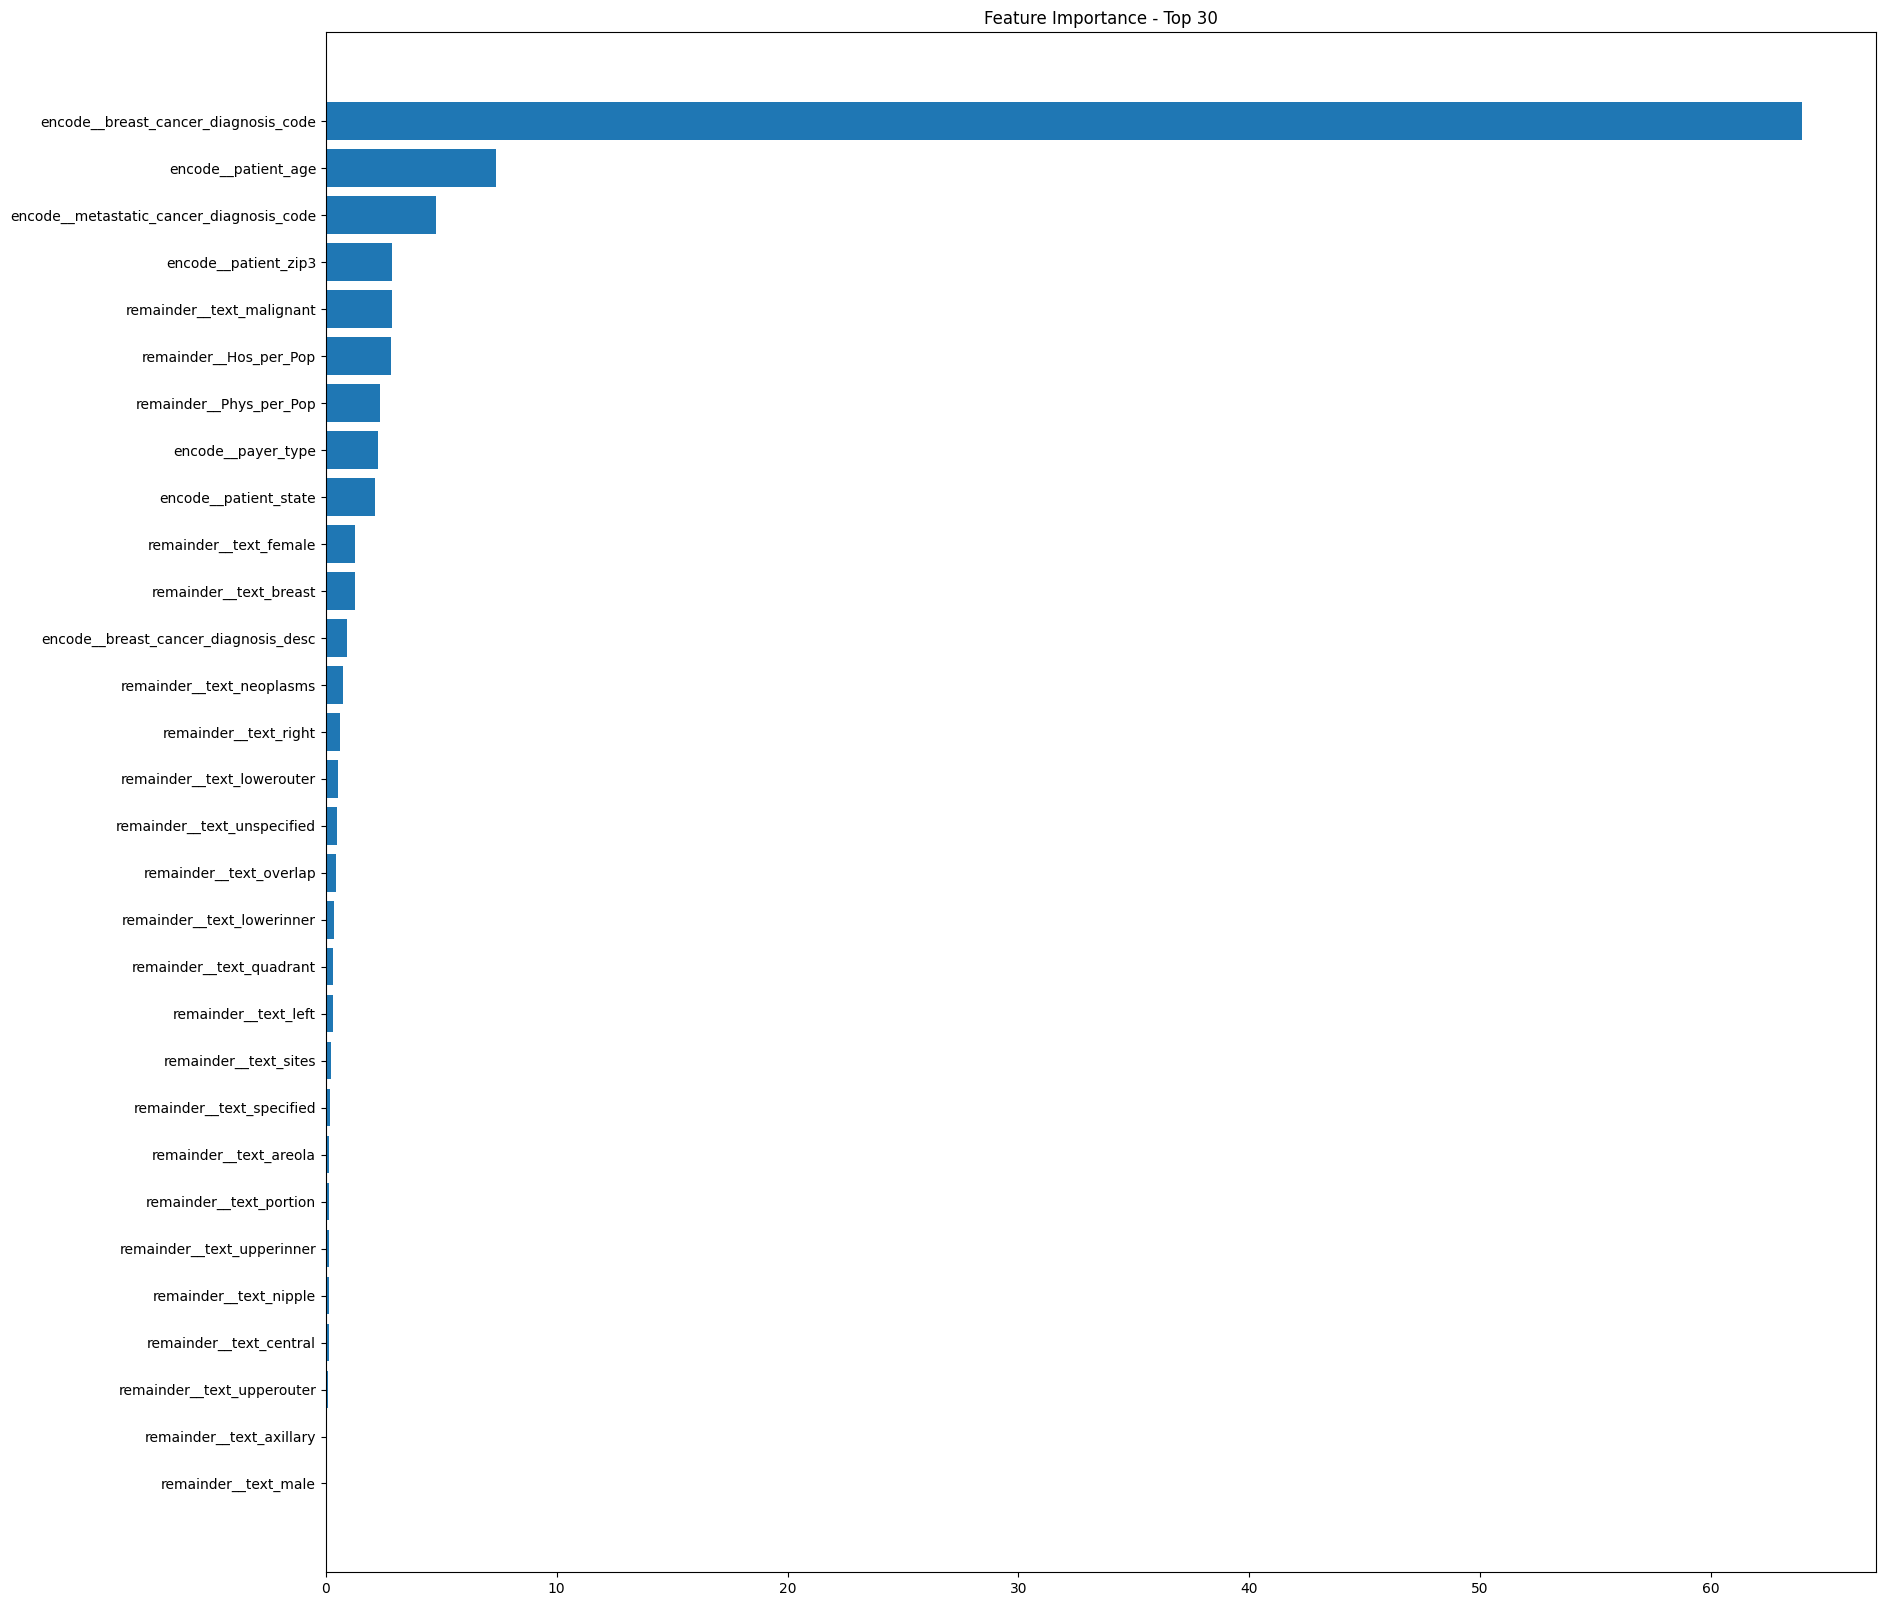

In [38]:
TOP = 30

feature_importance = cb_model.feature_importances_

# Get the feature names from 'df_train'
feature_names = df_train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(20, 20))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

### XGBoost

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb_params_optuna = {'max_depth': 8, 
                     'min_child_weight': 2, 
                     'learning_rate': 0.018519453248392475, 
                     'n_estimators': 337, 
                     'subsample': 0.5135251503383577, 
                     'colsample_bytree': 0.7526183406770304, 
                     'random_state': 2024}

# XGBoost model
xgb_model = XGBClassifier(**xgb_params_optuna)

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('Physician_per_Population', Phys_per_Pop()),
                                 ('Hospital_per_Population', Hos_per_Pop()),
                                 ('drop',
                                  DropColumn(cols=['population',
                                                   'Hospital_Count',
                                                   'Physician_Count'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.018519453248392475, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=337, n_jobs=None,
                               num_parallel_tree=None, random_state=2024, ...))])

In [41]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# Number of folds
n_splits = 10

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    xgb_pipeline.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = xgb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
    y_pred = xgb_pipeline.predict(X_val)
        
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    # Results
    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')

Fold 1, AUC Score on Validation Set: 0.7976337264331943
Fold 1, F1 Score on Validation Set: 0.7948173614384214
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8085723056458007
Fold 2, F1 Score on Validation Set: 0.7921619565089175
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.7918050190580951
Fold 3, F1 Score on Validation Set: 0.8004665805357661
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.8079903302550459
Fold 4, F1 Score on Validation Set: 0.80172429030655
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.7920864137525262
Fold 5, F1 Score on Validation Set: 0.7870690717601299
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.8113478805863242
Fold 6, F1 Score on Validation Set: 

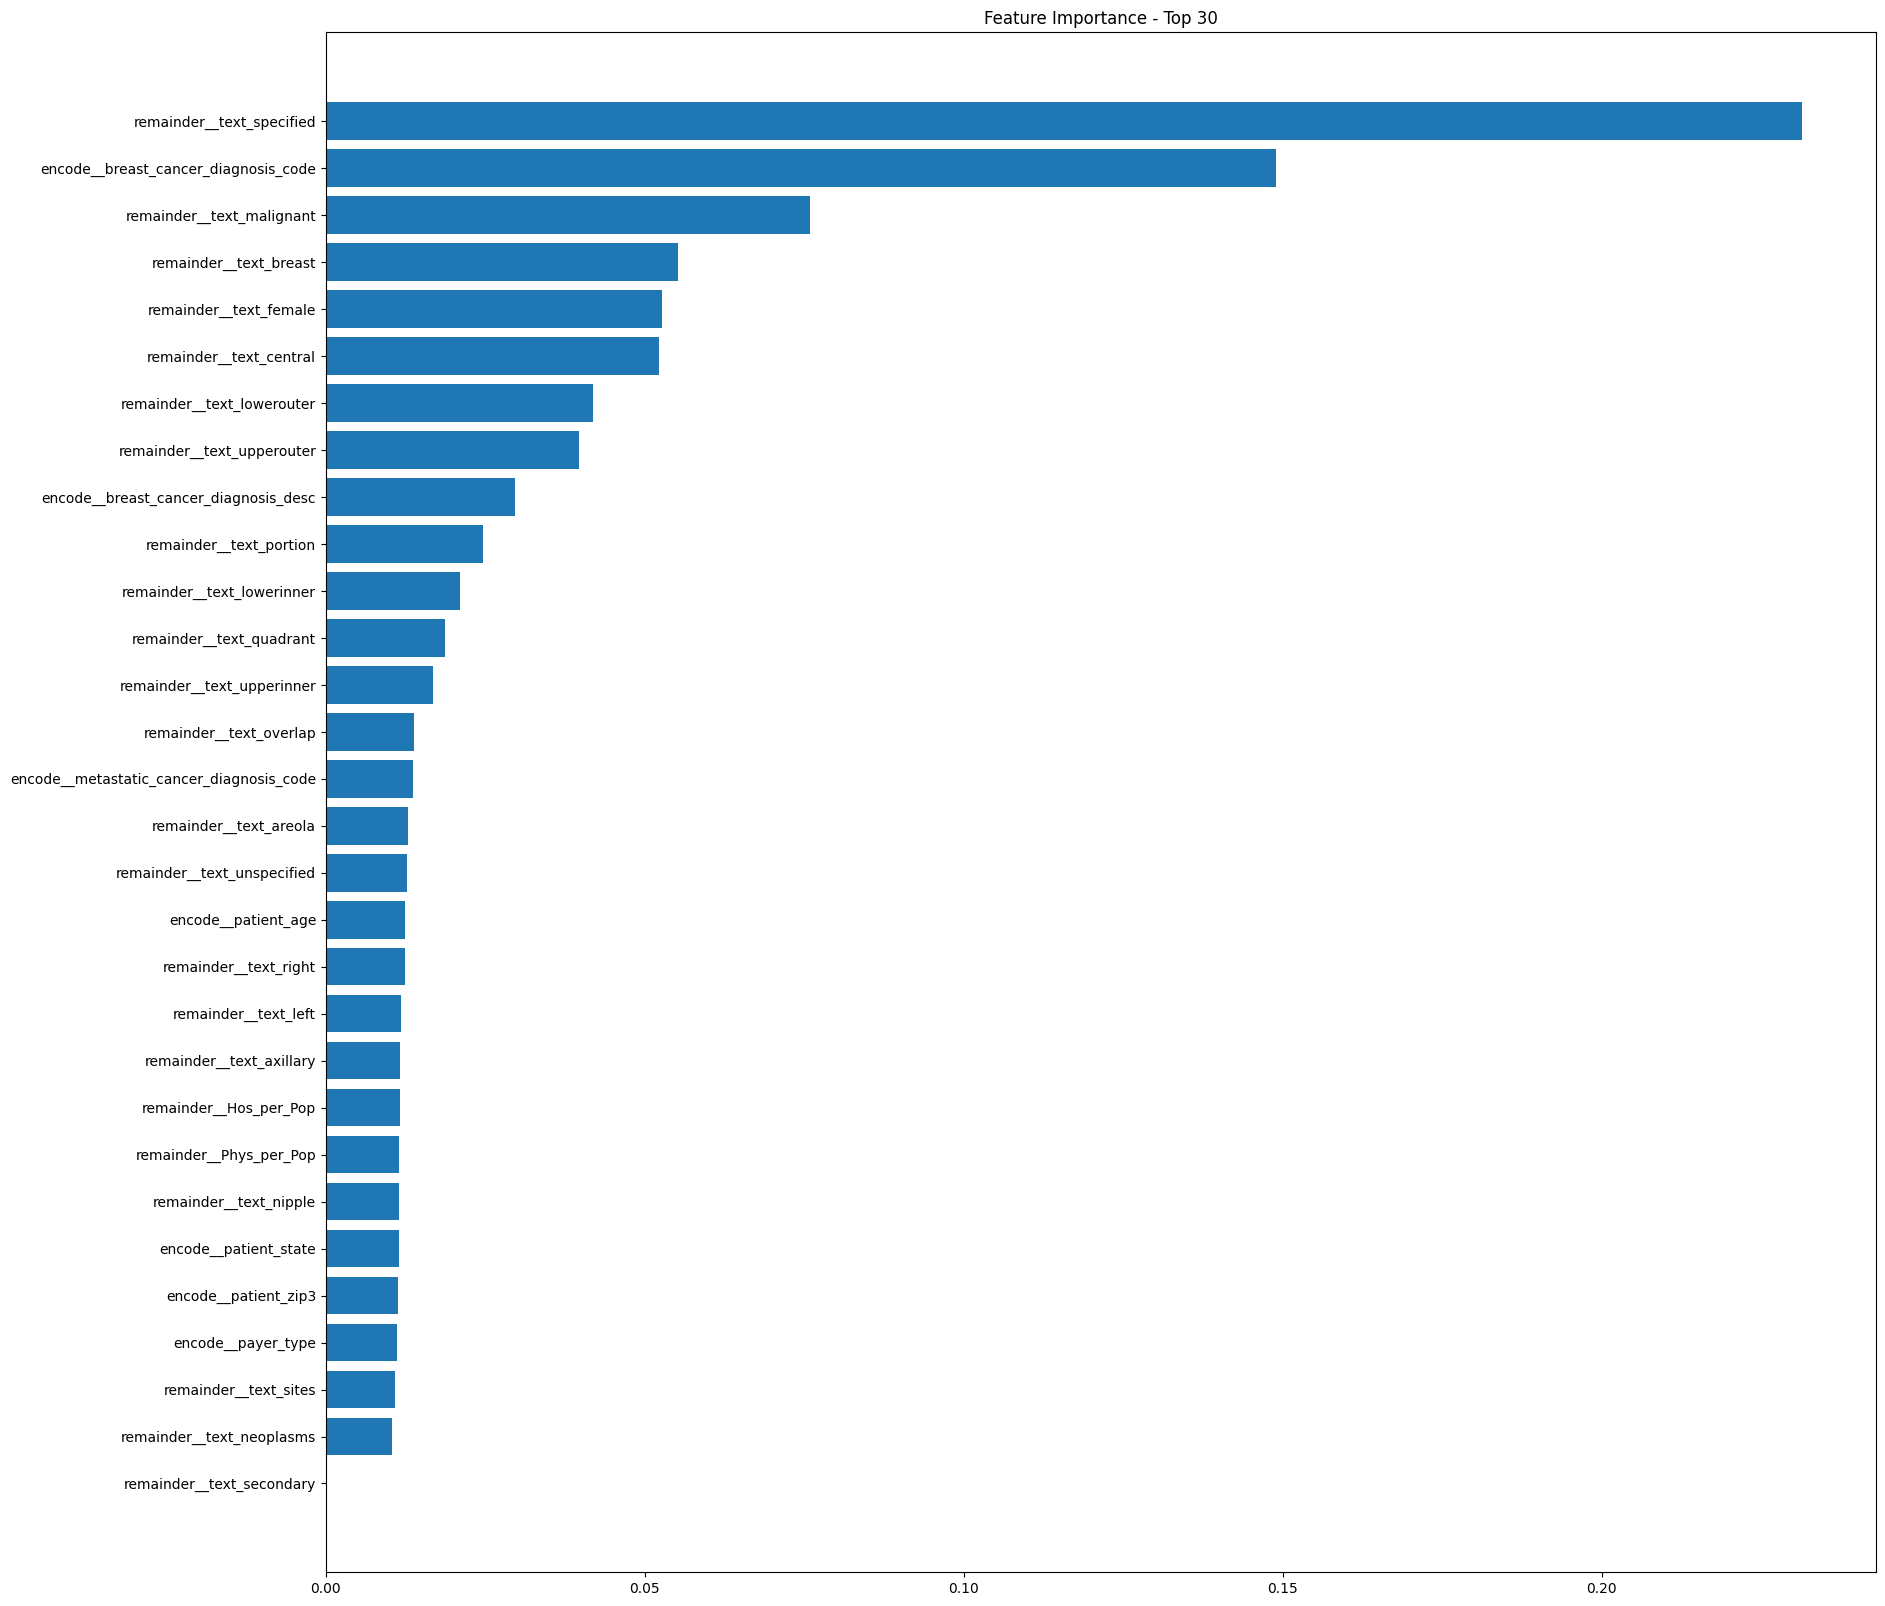

In [42]:
TOP = 30

feature_importance = xgb_model.feature_importances_

# Get the feature names from 'df_train'
feature_names = df_train.columns

# Sort the feature importances and get the indices of the sorted array
sorted_idx = np.argsort(feature_importance)

# Plot only the top 'TOP' features
fig = plt.figure(figsize=(20, 20))
plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
plt.title(f'Feature Importance - Top {TOP}')
plt.show()

## Submission

In [43]:
# from sklearn.ensemble import VotingClassifier

In [44]:
# ensemble_model = VotingClassifier(estimators=[
#     ('xgb', xgb_pipeline),
#     ('cb', cb_pipeline)
    
        
# ]
#                                   , voting='soft',
#                                   weights = [0.3,0.7]) 

# ensemble_model

In [45]:
test = TextPreprocessor(columns=['breast_cancer_diagnosis_desc']).fit_transform(test) 

In [46]:
# Fit the ensemble final model
cb_pipeline.fit(X, y)

# Create submission file with probability predictions
predictions = cb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_baseline.csv', index=False)

In [47]:
sample_submission.head(10)

,patient_id,DiagPeriodL90D
0,573710,0.791932
1,593679,0.761120
2,184532,0.794650
3,447383,0.793548
4,687972,0.821472
5,281312,0.135161
6,492714,0.883122
7,378266,0.861625
8,291550,0.762426
9,612272,0.815767


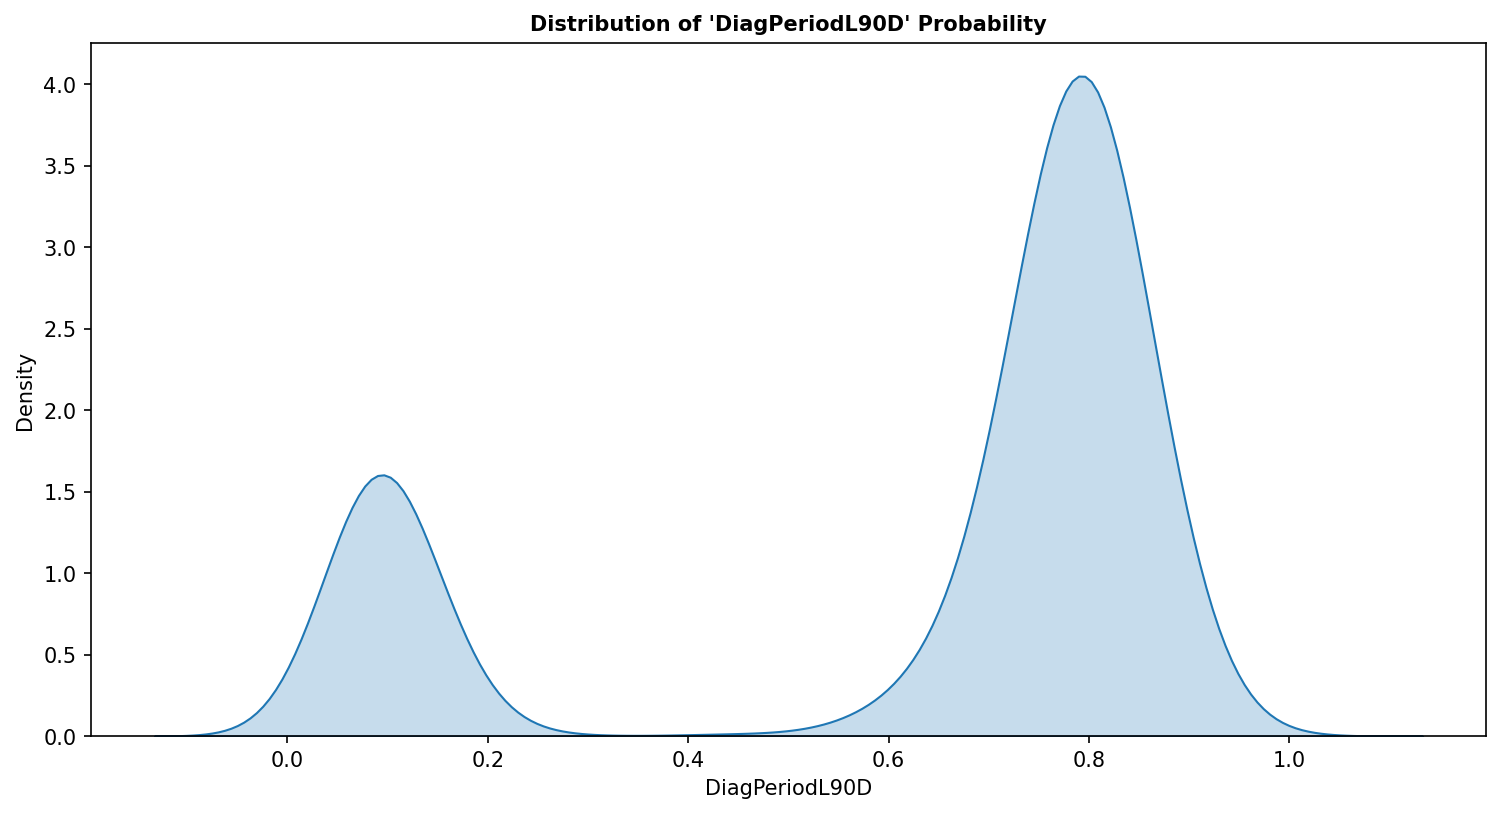

In [48]:
plt.figure(figsize = (12, 6), dpi = 150)
sns.kdeplot(sample_submission.DiagPeriodL90D, fill = True)
plt.title("Distribution of 'DiagPeriodL90D' Probability", weight = 'bold', size = 10)
plt.show()

## Hyper Parametertuning

In [49]:
# import optuna
# from sklearn.model_selection import  cross_val_score
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# import warnings
# # Set global warning filter
# warnings.filterwarnings("ignore")

### CatBoost tuning

In [50]:
# # Suppress FutureWarnings related to is_sparse
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

# def objective(trial):
#     params = {
#         'depth': trial.suggest_int('depth', 2, 10),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1.0, log=True),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'random_seed': 2024,
#         'eval_metric': 'AUC',
#         'verbose': False,
#         'loss_function': 'Logloss',
#     }
    
#     cb_model = CatBoostClassifier(**params)
#     cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
    

#     cv = abs(cross_val_score(cb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# best_params_cb = study.best_params
# print("Best Hyperparameters for CatBoost:", best_params_cb)

- Best Hyperparameters for CatBoost: {'depth': 4, 'l2_leaf_reg': 0.9645925640276364, 'learning_rate': 0.014127701493839157, 'colsample_bylevel': 0.6958766195896917, 'subsample': 0.7354377846364138}
-  Best is trial 44 with value: 0.807416608809155.

### XGBoost Tuning

In [51]:
# import xgboost as xgb

# def objective_xgb(trial):
#     """Define the objective function for XGBClassifier"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'random_state': trial.suggest_categorical('random_state', [2024]),
#         'tree_method': 'hist', 
#         'device' : 'cuda',
#         'eval_metric': 'auc',  # Evaluation metric
#         'verbosity': 2,  # Set verbosity to 0 for less output
#     }

#     xgb_model = xgb.XGBClassifier(**params)
#     xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)

#     cv = abs(cross_val_score(xgb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()
            
# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_xgb, n_trials=50, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_xgb = study.best_params
# print("Best Hyperparameters for XGBoost:", best_params_xgb)